# Exercícios para entrega (Prova)

## Questão 5

$p(x|\omega_{1}) \backsim \mathcal{N}\left(\mu_{1}=\begin{bmatrix}8\\7\end{bmatrix}, \Sigma_{1}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$p(x|\omega_{2}) \backsim \mathcal{N}\left(\mu_{2}=\begin{bmatrix}2\\0\end{bmatrix}, \Sigma_{2}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$P(\omega_{1}) = P(\omega_{2}) = \dfrac{1}{2}$

In [258]:
# Importação de módulos
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

np.random.seed(100)

In [2]:
# Delimitação de dimensões para as figuras
X_MIN = 0
X_MAX = 20
N_PONTOS = 1000

## Item (a)

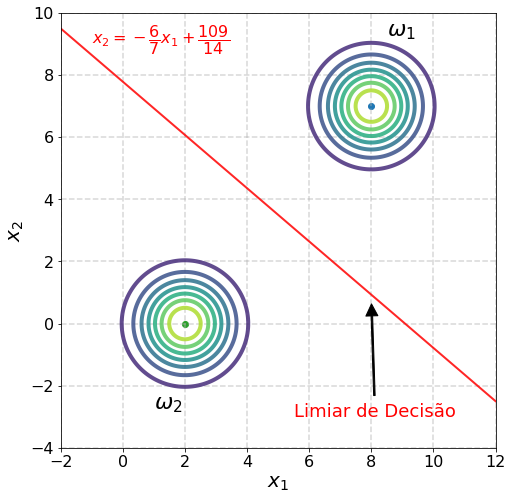

In [121]:
x, y = np.mgrid[-2:12.01:0.01, -4:10.01:0.01]
pos = np.dstack((x, y))

mu1 = [8, 7]
mu2 = [2, 0]

epsilon1 = [[1, 0], [0, 1]]
epsilon2 = [[1, 0], [0, 1]]

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(mu1[0], mu1[1], color='C0')
plt.scatter(mu2[0], mu2[1], color='C2')

rv1 = multivariate_normal(mu1, epsilon1)
plt.annotate(r'$\omega_{1}$', xy=(8.5, 9.25), fontsize=22)
rv2 = multivariate_normal(mu2, epsilon2)
plt.annotate(r'$\omega_{2}$', xy=(1.0, -2.75), fontsize=22)

plt.contour(x, y, rv1.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv1.pdf(pos))

plt.contour(x, y, rv2.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv2.pdf(pos))

# plt.colorbar()

a = -6/7
b = 109/14

x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.annotate('Limiar de Decisão', 
             xy=(8, 0.8), 
             xytext=(5.5, -3), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='black'), 
             color='red', 
             fontsize=18)

plt.annotate(r'$x_{2} = -\dfrac{6}{7}x_{1} + \dfrac{109}{14}$', xy=(-1, 9), fontsize=16, color='red')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-2, 12)
plt.ylim(-4, 10)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05a.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

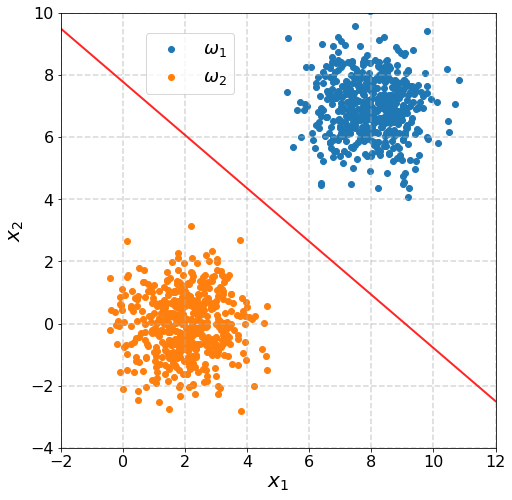

In [262]:
dados_1 = np.random.multivariate_normal(mu1, epsilon1, size=int(N_PONTOS * 0.5))
dados_2 = np.random.multivariate_normal(mu2, epsilon2, size=int(N_PONTOS * 0.5))

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(dados_1[:, 0], dados_1[:, 1], label=r'$\omega_{1}$')
plt.scatter(dados_2[:, 0], dados_2[:, 1], label=r'$\omega_{2}$')

plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(0.175, 0.975))

a = -6/7
b = 109/14
x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-2, 12)
plt.ylim(-4, 10)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05d_a.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [240]:
def classifica(amostra, limiar):
    x0 = amostra[0]
    y0 = amostra[1]
    a = limiar[0]
    b = limiar[1]
    
    r = a * x0 + b
    
    if y0 > r:
        return 1
    else:
        return 2

In [249]:
classifica(amostra=dados_1[0], limiar=[-6/7, 109/14])

1

In [250]:
def classifica_conjunto(amostras, limiar):
    classes = []
    for amostra in amostras:
        classes.append(classifica(amostra, limiar))
    return np.array(classes)

In [278]:
T = [1] * int(N_PONTOS * 0.5)
T.extend([2] * int(N_PONTOS * 0.5))
y_true = np.array(T)

y_pred_1 = classifica_conjunto(dados_1, [a, b])
y_pred_2 = classifica_conjunto(dados_2, [a, b])
y_pred = np.concatenate((y_pred_1, y_pred_2), axis=None)

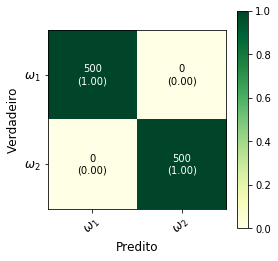

In [252]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

CM = confusion_matrix(y_true, y_pred)
nomes_das_classes = [r'$\omega_{1}$', r'$\omega_{2}$']

plot_confusion_matrix(conf_mat=CM, 
                      show_absolute=True, 
                      show_normed=True, 
                      colorbar=True, 
                      class_names=nomes_das_classes, 
                      figsize=(4, 4), 
                      cmap='YlGn')

plt.xlabel('Predito', fontsize=12)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('ml_prova_05d_a_matriz_confusao.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [248]:
# Avaliação de desempenho
from mlxtend.evaluate import scoring

erro = scoring(y_true, y_pred, metric='error')
acuracia = scoring(y_true, y_pred, metric='accuracy')
sensibilidade = scoring(y_true, y_pred, metric='sensitivity')
especificidade = scoring(y_true, y_pred, metric='specificity')

print('Verdadeiros Positivos: \t%d' % CM[0, 0])
print('Falsos Negativos: \t%d' % CM[0, 1])
print('Falsos Positivos: \t%d' % CM[1, 0])
print('Verdadeiros Negativos: \t%d' % CM[1, 1])

print('\n====================================\n')

print('Erro: \t\t%3.4f %%' % (erro * 100))
print('Acurácia: \t%3.4f %%' % (acuracia * 100))
print('Sensibilidade: \t%3.4f %%' % (sensibilidade * 100))
print('Especificidade: %3.4f %%' % (especificidade * 100))

Verdadeiros Positivos: 	500
Falsos Negativos: 	0
Falsos Positivos: 	0
Verdadeiros Negativos: 	500


Erro: 		0.0000 %
Acurácia: 	100.0000 %
Sensibilidade: 	100.0000 %
Especificidade: 100.0000 %


## Item (b)

$p(x|\omega_{1}) \backsim \mathcal{N}\left(\mu_{1}=\begin{bmatrix}8\\7\end{bmatrix}, \Sigma_{1}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$p(x|\omega_{2}) \backsim \mathcal{N}\left(\mu_{2}=\begin{bmatrix}2\\0\end{bmatrix}, \Sigma_{2}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$P(\omega_{1}) = \dfrac{1}{3}$

$P(\omega_{2}) = \dfrac{2}{3}$

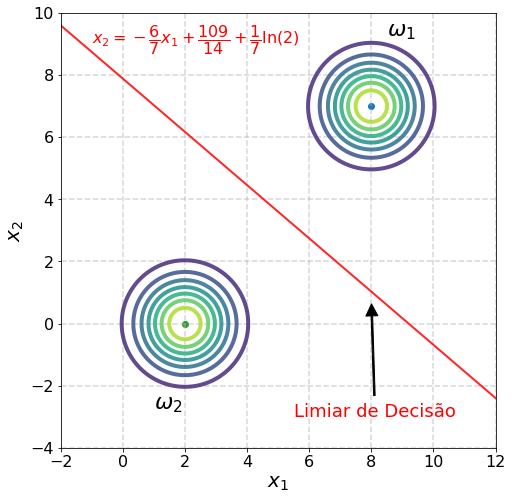

In [279]:
x, y = np.mgrid[-2:12.01:0.01, -4:10.01:0.01]
pos = np.dstack((x, y))

mu1 = [8, 7]
mu2 = [2, 0]

epsilon1 = [[1, 0], [0, 1]]
epsilon2 = [[1, 0], [0, 1]]

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(mu1[0], mu1[1], color='C0')
plt.scatter(mu2[0], mu2[1], color='C2')

rv1 = multivariate_normal(mu1, epsilon1)
plt.annotate(r'$\omega_{1}$', xy=(8.5, 9.25), fontsize=22)
rv2 = multivariate_normal(mu2, epsilon2)
plt.annotate(r'$\omega_{2}$', xy=(1.0, -2.75), fontsize=22)

plt.contour(x, y, rv1.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv1.pdf(pos))

plt.contour(x, y, rv2.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv2.pdf(pos))

# plt.colorbar()

a = -6/7
b = 109/14 + 1/7 * np.log(2)

x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.annotate('Limiar de Decisão', 
             xy=(8, 0.8), 
             xytext=(5.5, -3), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='black'), 
             color='red', 
             fontsize=18)

plt.annotate(r'$x_{2} = -\dfrac{6}{7}x_{1} + \dfrac{109}{14} + \dfrac{1}{7}\ln(2)$', xy=(-1, 9), fontsize=16, color='red')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-2, 12)
plt.ylim(-4, 10)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05b.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

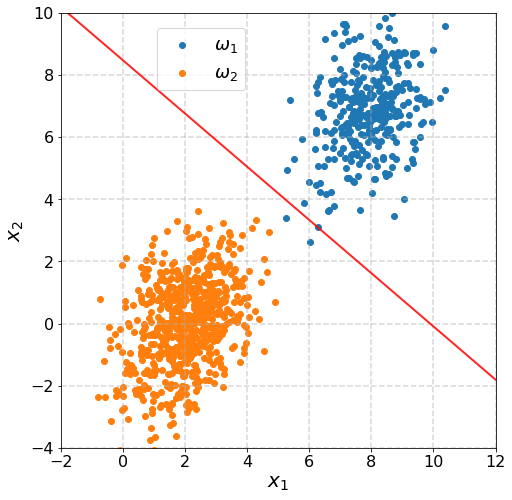

In [296]:
dados_1 = np.random.multivariate_normal(mu1, epsilon1, size=int(N_PONTOS * 1/3))
dados_2 = np.random.multivariate_normal(mu2, epsilon2, size=int(N_PONTOS * 2/3))

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(dados_1[:, 0], dados_1[:, 1], label=r'$\omega_{1}$')
plt.scatter(dados_2[:, 0], dados_2[:, 1], label=r'$\omega_{2}$')

plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(0.2, 0.985))

a = -6/7
b = 109/14 + np.log(2)
x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-2, 12)
plt.ylim(-4, 10)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05d_b.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [297]:
T = [1] * int(N_PONTOS * 1/3)
T.extend([2] * int(N_PONTOS * 2/3))
y_true = np.array(T)

y_pred_1 = classifica_conjunto(dados_1, [a, b])
y_pred_2 = classifica_conjunto(dados_2, [a, b])
y_pred = np.concatenate((y_pred_1, y_pred_2), axis=None)

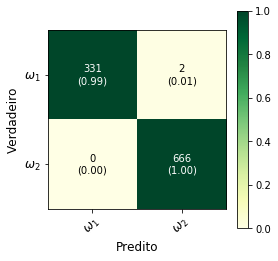

In [298]:
# Matriz de Confusão

CM = confusion_matrix(y_true, y_pred)
nomes_das_classes = [r'$\omega_{1}$', r'$\omega_{2}$']

plot_confusion_matrix(conf_mat=CM, 
                      show_absolute=True, 
                      show_normed=True, 
                      colorbar=True, 
                      class_names=nomes_das_classes, 
                      figsize=(4, 4), 
                      cmap='YlGn')

plt.xlabel('Predito', fontsize=12)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('ml_prova_05d_b_matriz_confusao.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [299]:
# Avaliação de desempenho

erro = scoring(y_true, y_pred, metric='error')
acuracia = scoring(y_true, y_pred, metric='accuracy')
sensibilidade = scoring(y_true, y_pred, metric='sensitivity')
especificidade = scoring(y_true, y_pred, metric='specificity')

print('Verdadeiros Positivos: \t%d' % CM[0, 0])
print('Falsos Negativos: \t%d' % CM[0, 1])
print('Falsos Positivos: \t%d' % CM[1, 0])
print('Verdadeiros Negativos: \t%d' % CM[1, 1])

print('\n====================================\n')

print('Erro: \t\t%3.4f %%' % (erro * 100))
print('Acurácia: \t%3.4f %%' % (acuracia * 100))
print('Sensibilidade: \t%3.4f %%' % (sensibilidade * 100))
print('Especificidade: %3.4f %%' % (especificidade * 100))

Verdadeiros Positivos: 	331
Falsos Negativos: 	2
Falsos Positivos: 	0
Verdadeiros Negativos: 	666


Erro: 		0.2002 %
Acurácia: 	99.7998 %
Sensibilidade: 	99.3994 %
Especificidade: 100.0000 %


## Item (c)

$p(x|\omega_{1}) \backsim \mathcal{N}\left(\mu_{1}=\begin{bmatrix}8\\7\end{bmatrix}, \Sigma_{1}=\begin{bmatrix}1&\dfrac{1}{2}\\\dfrac{1}{2}&2\end{bmatrix}\right)$

$p(x|\omega_{2}) \backsim \mathcal{N}\left(\mu_{2}=\begin{bmatrix}2\\0\end{bmatrix}, \Sigma_{2}=\begin{bmatrix}1&\dfrac{1}{2}\\\dfrac{1}{2}&2\end{bmatrix}\right)$

$P(\omega_{1}) = P(\omega_{2}) = \dfrac{1}{2}$

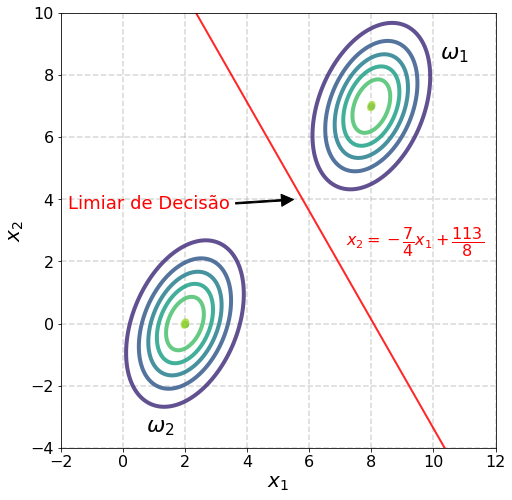

In [300]:
x, y = np.mgrid[-2:12.01:0.01, -4:10.01:0.01]
pos = np.dstack((x, y))

mu1 = [8, 7]
mu2 = [2, 0]

epsilon1 = [[1, 0.5], [0.5, 2]]
epsilon2 = [[1, 0.5], [0.5, 2]]

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(mu1[0], mu1[1], color='C0')
plt.scatter(mu2[0], mu2[1], color='C2')

rv1 = multivariate_normal(mu1, epsilon1)
plt.annotate(r'$\omega_{1}$', xy=(10.2, 8.50), fontsize=22)
rv2 = multivariate_normal(mu2, epsilon2)
plt.annotate(r'$\omega_{2}$', xy=(0.75, -3.5), fontsize=22)

plt.contour(x, y, rv1.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv1.pdf(pos))

plt.contour(x, y, rv2.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv2.pdf(pos))

# plt.colorbar()

a = -7/4
b = 113/8

x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.annotate('Limiar de Decisão', 
             xy=(5.6, 4), 
             xytext=(-1.75, 3.7), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='black'), 
             color='red', 
             fontsize=18)

plt.annotate(r'$x_{2} = -\dfrac{7}{4}x_{1} + \dfrac{113}{8}$', xy=(7.2, 2.5), fontsize=16, color='red')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-2, 12)
plt.ylim(-4, 10)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05c.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

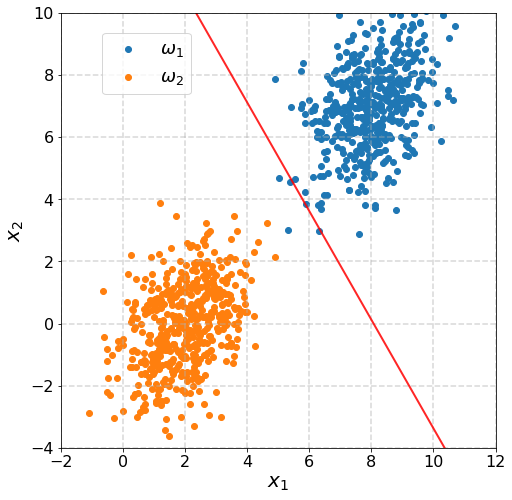

In [306]:
dados_1 = np.random.multivariate_normal(mu1, epsilon1, size=int(N_PONTOS * 1/2))
dados_2 = np.random.multivariate_normal(mu2, epsilon2, size=int(N_PONTOS * 1/2))

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(dados_1[:, 0], dados_1[:, 1], label=r'$\omega_{1}$')
plt.scatter(dados_2[:, 0], dados_2[:, 1], label=r'$\omega_{2}$')

plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(0.075, 0.975))

a = -7/4
b = 113/8
x1 = np.linspace(-2, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-2, 12)
plt.ylim(-4, 10)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_05d_c.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [309]:
T = [1] * int(N_PONTOS * 1/2)
T.extend([2] * int(N_PONTOS * 1/2))
y_true = np.array(T)

y_pred_1 = classifica_conjunto(dados_1, [a, b])
y_pred_2 = classifica_conjunto(dados_2, [a, b])
y_pred = np.concatenate((y_pred_1, y_pred_2), axis=None)

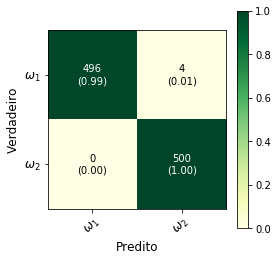

In [310]:
# Matriz de Confusão

CM = confusion_matrix(y_true, y_pred)
nomes_das_classes = [r'$\omega_{1}$', r'$\omega_{2}$']

plot_confusion_matrix(conf_mat=CM, 
                      show_absolute=True, 
                      show_normed=True, 
                      colorbar=True, 
                      class_names=nomes_das_classes, 
                      figsize=(4, 4), 
                      cmap='YlGn')

plt.xlabel('Predito', fontsize=12)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('ml_prova_05d_c_matriz_confusao.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [311]:
# Avaliação de desempenho

erro = scoring(y_true, y_pred, metric='error')
acuracia = scoring(y_true, y_pred, metric='accuracy')
sensibilidade = scoring(y_true, y_pred, metric='sensitivity')
especificidade = scoring(y_true, y_pred, metric='specificity')

print('Verdadeiros Positivos: \t%d' % CM[0, 0])
print('Falsos Negativos: \t%d' % CM[0, 1])
print('Falsos Positivos: \t%d' % CM[1, 0])
print('Verdadeiros Negativos: \t%d' % CM[1, 1])

print('\n====================================\n')

print('Erro: \t\t%3.4f %%' % (erro * 100))
print('Acurácia: \t%3.4f %%' % (acuracia * 100))
print('Sensibilidade: \t%3.4f %%' % (sensibilidade * 100))
print('Especificidade: %3.4f %%' % (especificidade * 100))

Verdadeiros Positivos: 	496
Falsos Negativos: 	4
Falsos Positivos: 	0
Verdadeiros Negativos: 	500


Erro: 		0.4000 %
Acurácia: 	99.6000 %
Sensibilidade: 	99.2000 %
Especificidade: 100.0000 %
